# ***Import Libaries***

In [23]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle

## ***Generating Random Data***

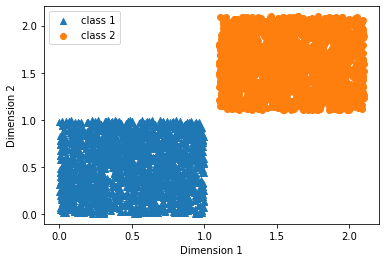

(2000, 2) (2000,)
(4000, 2) (4000,)
[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 ...
 [1.66553406e+00 1.36890296e+00]
 [1.57935520e+00 1.77465879e+00]
 [1.78423073e+00 1.92139131e+00]]


In [24]:
import matplotlib.pyplot as plt
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

print(class1.shape, class_1_label.shape)

# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)
print(data.shape, label.shape)
print(data)

## ***Activation Functions***

In [25]:
######################################### Loss Function #####################################

def Cross_Entropy(Y_hat, Y):
    Y = Y.reshape(-1,1)
    loss = - (1/len(Y)) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return loss

######################################## Activation Functions ###################################

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(x):
    return x*(1-x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

######################################## Accuracy Function ##########################################

def accuracy(Y_hat,Y):
    Y = Y.reshape(-1,1)
    return np.sum(Y_hat==Y)/len(Y)

####################################### Save Model Function ###########################################

def save_model(weights, path):
    File = open(path, 'wb')
    pickle.dump(weights, File)
    File.close()

######################################## Load Model Function ############################################

def load_model(path):
    model = open(path, 'rb')
    weights = pickle.load(model)
    return weights


## ***Data Loader***

In [26]:
####################################### Data Loader #################################   

def load_data(data, label):

    x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3)
    x1_train, x_val, y1_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
    # print("Train Set = ", x_train.shape)
    # print("Train Label = ", y_train.shape)
    # print("Val Set :", x_val.shape)
    # print("Val Label :", y_val.shape)
    # print("Test Set :", x_test.shape)
    # print("Test Label :", y_test.shape)
    return x_val, y_val, x_test, y_test
    

# ***Weights Initialization***

In [27]:
def initialize_weights(input_size, outputsize, no_of_neurons):

    w = []

    w_in = np.random.randn(input_size + 1, no_of_neurons[0])
    w.append(w_in)
    # print(w_in.shape)
    # print(w1.shape)
    for i in range(len(no_of_neurons)-1): 
        weights = np.random.randn(no_of_neurons[i] + 1, no_of_neurons[i+1])
        w.append(weights)
        # print(weights.shape)
    w_out = np.random.randn(no_of_neurons[len(no_of_neurons)-1]+1, output_size)
    w.append(w_out)
    # print(w_out.shape)
    
    return w

## **Feed Forward**

In [28]:
def forward(w, input):
    list_A = []
    input = np.concatenate( (input, np.ones((len(input), 1))), axis=1)
    for j in range(len(w)):
        if j == 0:
            z = np.dot(w[j].T, input.T) # 3x100
            a = sigmoid(z).T # 100x3
            a = np.concatenate( (a, np.ones((len(a), 1))), axis=1) # 100x4
            # print("a"+str(j)+" shape:", a.shape)
            # print("a"+ str(j) +"\n", a)
            list_A.append(a)
        elif (j < len(w)-1):
            z = np.dot(w[j].T, list_A[-1].T) # 5x100
            a = sigmoid(z).T # 100x3
            a = np.concatenate( (a, np.ones((len(a), 1))), axis=1) # 100x4
            # print("a"+str(j)+" shape:", a.shape)
            # print("a"+ str(j) +"\n", a)
            list_A.append(a)
        else:
            z = np.dot(w[-1].T, list_A[-1].T) # 1x100
            a = sigmoid(z).T # 
            # print("a"+str(j)+" shape:", a.shape)
            # print("a"+ str(j) +"\n", a)
            list_A.append(a)
    return list_A
    

## ***Back Propagation***

In [29]:
def back_propagate(A, y, w, input):
    input = np.concatenate( (input, np.ones((len(input), 1))), axis=1)
    out = A[-1]
    A = A[:-1]
    change_in_weights = []

    dL = np.multiply( out - y.reshape(-1,1), derivative_sigmoid(out) ) # 100x1
    dwL = np.dot(A[-1].T, dL) # 8x1
    # print("\ndwL\n", dwL.shape)
    change_in_weights.append(dwL)

    for i in reversed( range(len(A)) ):
        # term1 = np.dot(w[i+2],dL) #8x1
        if i > 0:
            dL = np.multiply( np.dot(w[i+1], dL.T), derivative_sigmoid(A[i]).T ) #8x100
            dL = dL[:-1,:].T # 100x7
            dw = np.dot(A[i-1].T, dL) #6x7
            # print("\ndw"+ str(i) + "\n", dw.shape)
            change_in_weights.append(dw)
        else:
            dL = np.multiply( np.dot(w[i+1], dL.T), derivative_sigmoid(A[i]).T ) #4x100
            dL = dL[:-1,:].T # 100x3
            dw = np.dot(input.T, dL) #3x3
            # print("\ndw"+ str(i) + "\n", dw.shape)
            change_in_weights.append(dw)

    return change_in_weights 
    

## **Updating Weights**

In [30]:
def update_w(w, dw, lr):

    dw.reverse()

    for i in range(len(w)):
        #print("w:\n",w[i])
        #print("dw:\n", dw[i])
        w[i]  = w[i] - ( lr * dw[i] )

    return w
    

## **Evaluate Model**

In [31]:
def evaluate_model(model_weights, data, labels):
    labels = labels.reshape(-1,1)
    A = forward(model_weights, data)
    pred = A[-1]    
    loss = Cross_Entropy(pred, labels)
    pred[pred>=0.5] = 1
    pred[pred<0.5] = 0
    acc = accuracy(pred, labels)
    
    return loss, acc
    

## **Train Model**

In [32]:
def train_model(weights, input, target, val_data, val_label, epochs, learning_rate):
        
    train_loss_list = list()
    train_acc_list = list()
    val_loss_list = list()
    val_acc_list = list()

    for k in range(1,epochs+1):
        # print("\n*********** Epoch"+str(k)+"***********")
        
        ################## Neural Network #########################
        A = forward(weights, input)           # feed forward
        list_change_in_weights = back_propagate(A, target, weights, input)
        weights = update_w(weights, list_change_in_weights, learning_rate)
        
        ################### Evaluation Train ############################
        loss, acc = evaluate_model(weights, input, target)
        train_loss_list.append(loss)
        train_acc_list.append(acc)

        ################### Evaluation Train ############################
        val_loss, val_acc = evaluate_model(weights, val_data, val_label)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

    save_model( weights, './weights.pkl' )

    return train_loss_list, train_acc_list, val_loss_list, val_acc_list
    

## **Testing Model**

In [33]:
def test_model(trained_weights, test_data, test_label):
    # test_label = test_label.reshape(-1,1)
    A = forward(weights, test_data)    
    pred = A[-1]    
    loss = Cross_Entropy(pred, test_label)
    pred[pred>=0.5] = 1
    pred[pred<0.5] = 0
    acc = accuracy(pred, test_label)
    pred = pred.reshape(-1)
    print( "\nTest Set Loss: ", loss )
    print( "Test Set Accuracy: {:.2f}".format(acc * 100) )
    print( "\nTrue Labels:\n",  test_label[:6] )
    print( "\nPredicted Lables:\n", pred[:6] )


## ***Model Parameters***

In [46]:
learning_rate = 0.0001
epochs = 500
input_size = 2
output_size = 1
no_of_neurons = [1]
input = data
target = label

# ***Perform Training***

In [39]:
def run_training_model():

    
    # print(input[0].shape)

    # x_train, y_train, x_val, y_val, x_test, y_test = load_data(input, target) 

    weights = initialize_weights(input_size,output_size,no_of_neurons)  #weights initialize

    val_data, val_label, test_data, test_label = load_data(input, target)
    # print("Train_data : ", input.shape)
    # print("Train_label : ", target.shape)
    # print("val_data : ", val_data.shape)
    # print("Val_Label : ", val_label.shape)
    # print("Test_data : ", test_data.shape)
    # print("Test_Label : ", test_label.shape)
    train_loss, train_acc, val_loss, val_acc = train_model(weights, input, target, 
                                                                val_data, val_label, epochs, learning_rate)

    print("Training Loss : ", train_loss[-1])
    print("Training Accuracy : ", train_acc[-1] * 100)
    print("Validation Loss : ", val_loss[-1])
    print("Validation Accuracy : ", val_acc[-1] * 100)

    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss", fontsize=12, fontweight="bold")
    plt.legend(["Training Loss", "Validation Loss"])
    plt.savefig("train_loss.png")
    plt.show()

    # plt.plot(val_loss)
    # plt.show()

    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy", fontsize=12, fontweight="bold")
    plt.legend(["Training Accuracy", "Validation Accuracy"])
    plt.savefig("train_accuracy.png")
    plt.show()

# plt.plot(val_acc)
# plt.show()


# ***Perform Testing***

In [36]:
def run_testing_model():
    trained_weights = load_model('./weights.pkl')
    test_model(trained_weights, test_data, test_label)
    

## ***Main Function***

Training Loss :  0.31899104152692337
Training Accuracy :  99.97500000000001
Validation Loss :  0.3212085806678003
Validation Accuracy :  100.0


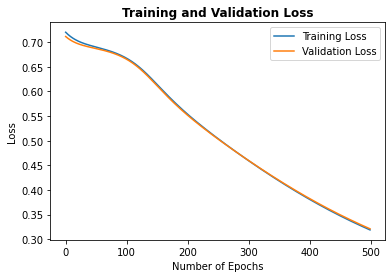

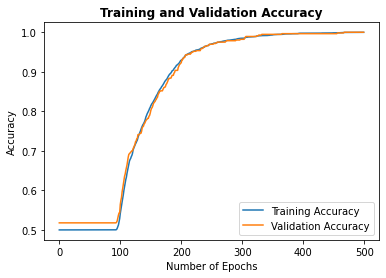


Test Set Loss:  0.01038139074761243
Test Set Accuracy: 100.00

True Labels:
 [0 0 0 0 0 1]

Predicted Lables:
 [0. 0. 0. 0. 0. 1.]


In [47]:
def Run_Complete_Model():
    run_training_model()
    run_testing_model()

Run_Complete_Model()